# Displaying Data with Python

In [2]:
import pandas as pd
hour = pd.read_csv('hour.csv')
# read_csv() is designed to read data that is stored in .csv files
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


# Calculating Summary Statistics

In [2]:
print(hour['count'].mean())
# accessing the 'count' column of the hour dataset
# hour['count'] prints the entire column

189.46308763450142


In [4]:
# calculating other metrics
print(hour['count'].median())
print(hour['count'].std())
print(hour['registered'].min())
print(hour['registered'].max())
# "These simple calculations are called summary statistics, and they’re useful to check for every dataset you ever work with.”

142.0
181.38759909186527
0
886


In [5]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

# Analyzing Subsets of Data

In [6]:
# Nighttime Data
print(hour.loc[3,'count'])
# “loc() method allows us to specify a subset of our full data"

13


In [7]:
print(hour.loc[2:4, 'registered'])

2    27
3    10
4     1
Name: registered, dtype: int64


In [8]:
print(hour.loc[hour['hr']<5,'registered'].mean())
#“specifies a logical condition: hour['hr']<5, meaning that it will select every row in our data for which the 
# value of the hr variable is less than 5”

20.7881427367238


In [9]:
print(hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean())
print(hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean())

19.521104742053154
33.639322916666664


In [10]:
print(hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5),'count'].mean())

193.36764103264582


In [3]:
# Seasonal Data
print(hour.groupby(['season'])['count'].mean())
#“groupby(['...']) is a method that splits the data into groups—in this case, one group for each unique value that appears in the season column”

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


In [4]:
print(hour.groupby(['season','holiday'])['count'].mean())
#“It shows us average ridership counts on holidays and non-holidays separately for each season”
#“It shows us average ridership counts on holidays and non-holidays separately for each season”

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


# Visualizing Data with Matplotlib

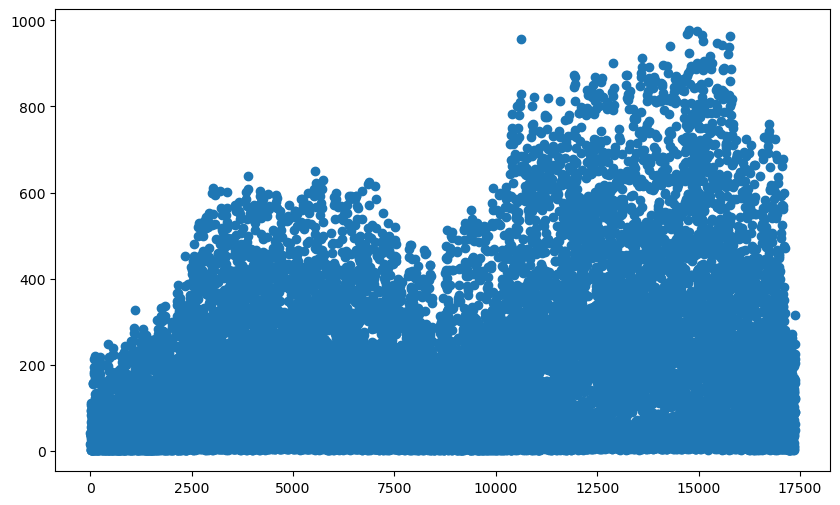

In [5]:
#Drawing and Displaying a Simple Plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

In [ ]:
#“we create a figure, called fig, and an axis, called ax. 
# The figure, fig, will contain all the information about whatever plot or group of plots we draw. 
# The axis, ax, will give us access to useful methods for actually drawing plots. 
# The subplots() method creates both of these for us, and inside that method, we can specify a figure size (figsize). 
# In this case, we specify a figure size of (10,6), meaning that our figure will have a width of 10 inches and a 
# height of 6 inches”

#“In scatter(), we specify x=hour['instant'] so the x-axis will show the instant variable in our hour data. 
# We specify y=hour['count'] so the y-axis will show the count variable”

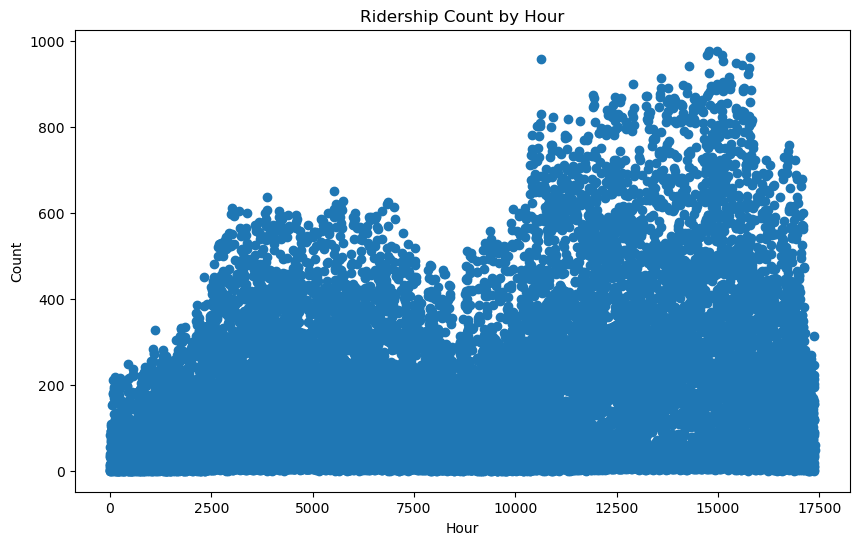

In [6]:
# Clarifying Plots with Titles and Labels
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

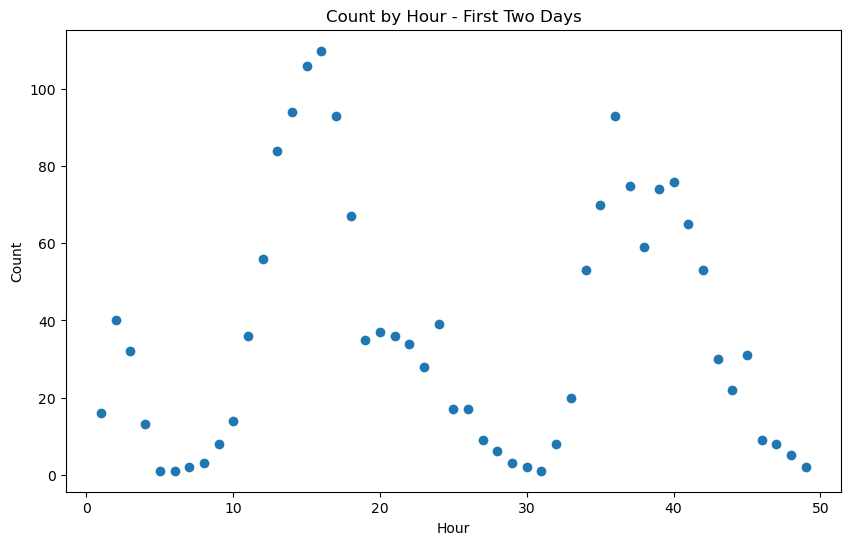

In [7]:
# Plotting Subsets of Data
hour_first48=hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

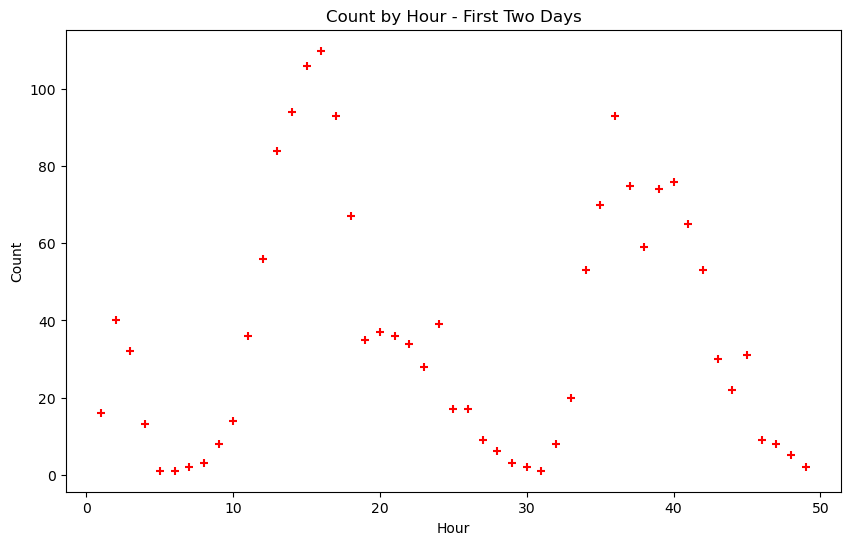

In [8]:
# Testing Different Plot Types
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'],c='red',marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

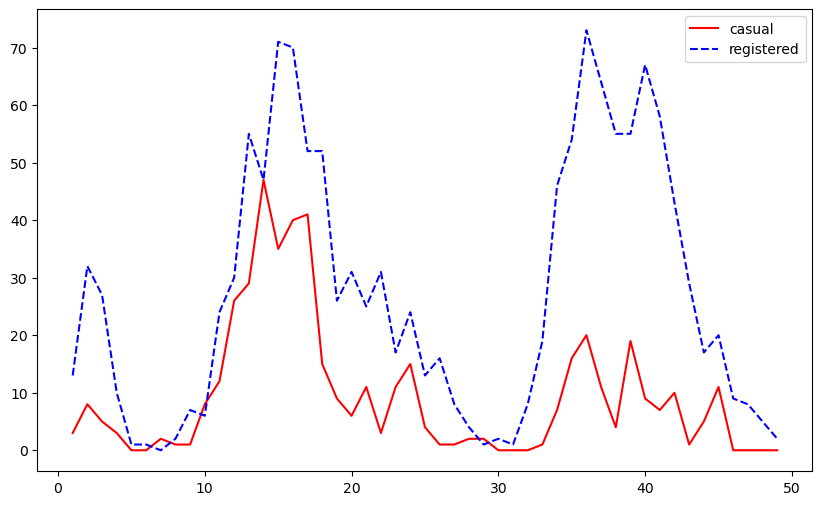

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot() draws the plot
ax.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'],\
hour_first48['registered'],c='blue',label='registered',linestyle='--')
ax.legend()
plt.show()

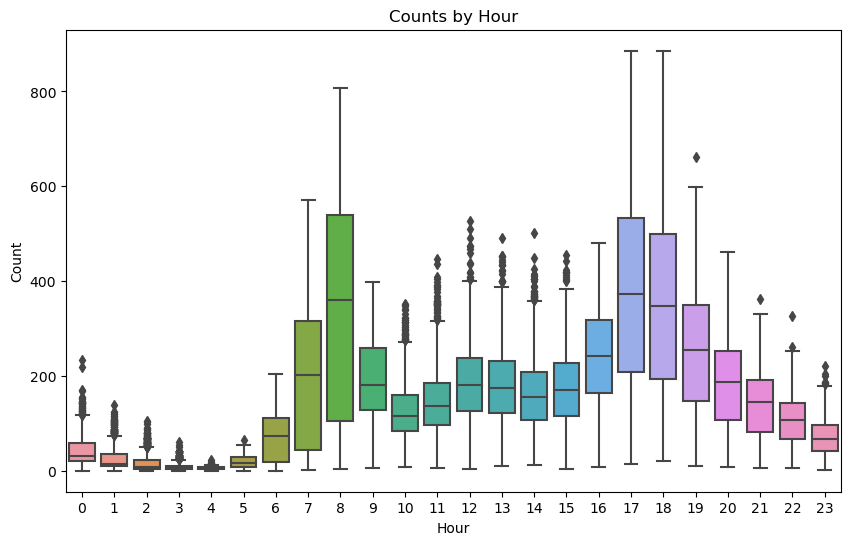

In [11]:
# Different kind of plot - Box Plot
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

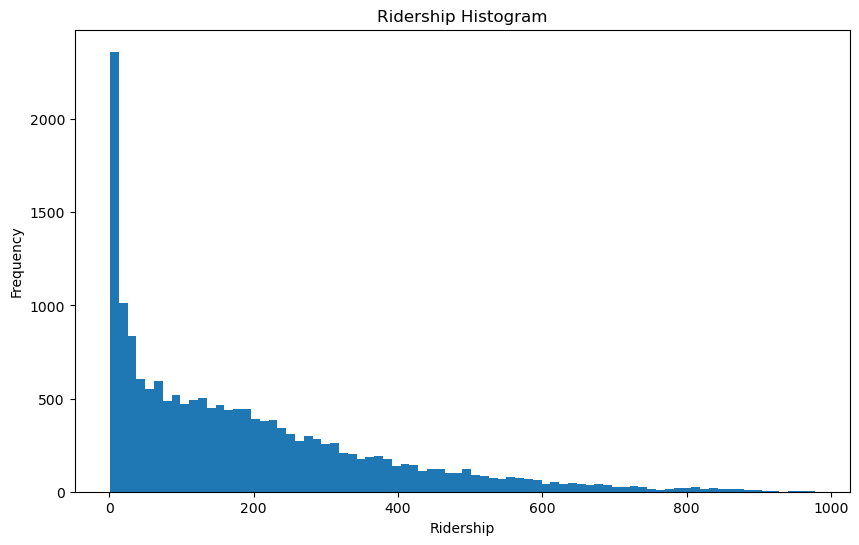

In [12]:
# Different kind of plot - Histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'],bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

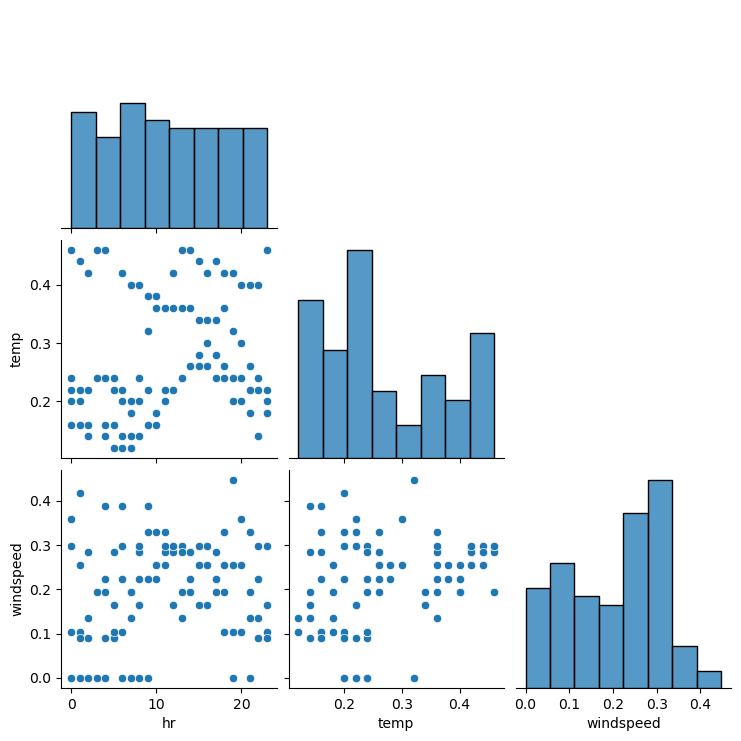

In [13]:
# Pair Plot - "draws every possible scatterplot for every possible pair of variables in the data"
thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

## Exploring Correlations

In [ ]:
# “Two variables are correlated if a change in one variable tends to occur together with a change in the other variable”
# “Two variables are positively correlated if they change together: one variable tends to go up when the other goes up, and one variable tends to go down when the other goes down”
# “Two variables are negatively correlated if one tends to go up when the other goes down, or if one tends to go down when the other goes up”

In [16]:
# Calculating Correlations
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))
# corr() method calculates a number called the correlation coefficient
# the correlation coefficient is a number between -1 and 1, often named r
# variables are 'uncorrelated' if the correlation coefficient is 0 or very close to 0

0.5066177004294636
-0.06988139105119348


In [ ]:
# Understanding Strong vs. Weak Correlations

# strong correlation - cc is large (close to either 1 or 0)
# “deterministic positive correlation that appears as a straight line on a plot is also called a perfect correlation,
# and when we measure a correlation coefficient for a perfect positive correlation, we’ll find that r = 1”

In [ ]:
# “When two variables are correlated but don’t have a deterministic relationship, we say that the relationship between
# the two variables has “noise,” or randomness.”
# Randomness = unpredictability
# "the size of the correlation coefficient can be a measure of the amount of randomness in the relationship between two variables"

# “A larger correlation coefficient corresponds to less randomness (closer to a deterministic relationship, like the relationship between Fahrenheit and Celsius)."
# "A smaller correlation coefficient corresponds to more randomness and less predictability.”

In [ ]:
# "Correlation does not imply causation"

# “spurious correlation: a correlation that occurs only by coincidence and does not indicate any causation or special relationship”

# “omitted variable - something we haven’t observed but is independently causing increases”

## Finding Correlations Between Variables

In [17]:
# "correlation matrix: a matrix with each of whose elements is the correlation coefficient measuring the relationship between two particular variables”
thenames=['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)
# corr() creates a correlation matrix
# every entry is a cc

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


## Creating Heat Maps

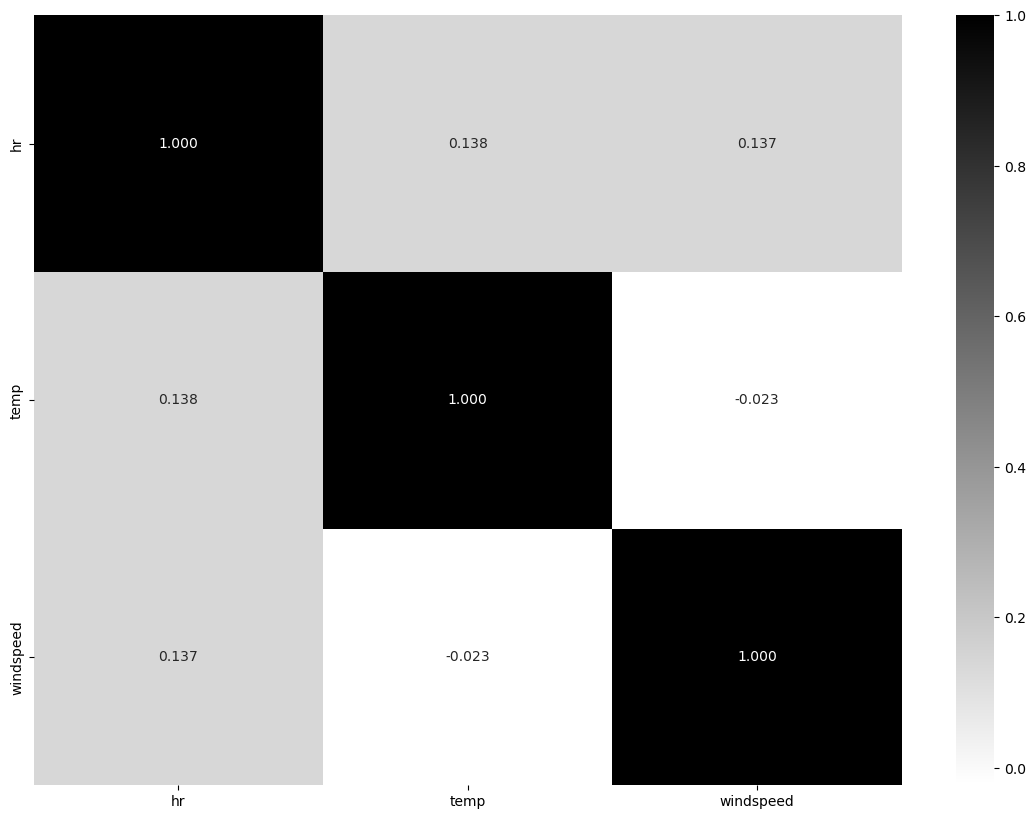

In [18]:
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',
        fmt=".3f",
        xticklabels=thenames,
        yticklabels=thenames)
plt.show()
# “the color or darkness of a cell indicates the value of the number in that cell”

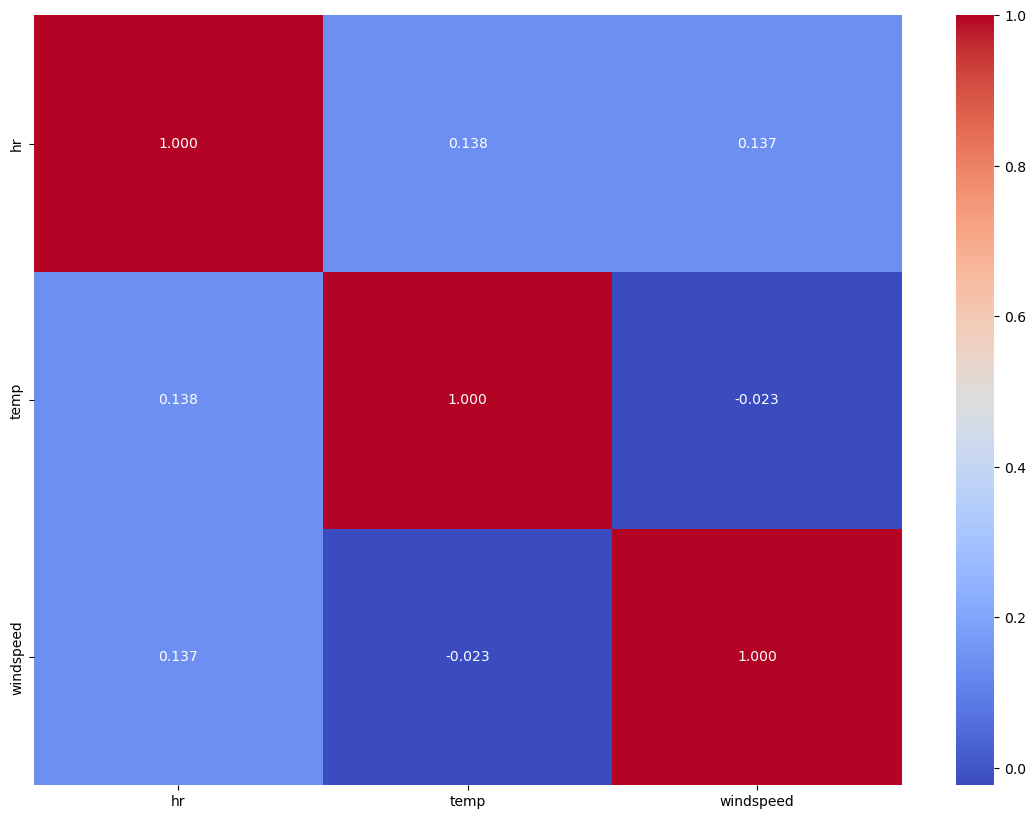

In [19]:
# same heatmap as previous, experimenting with different cmap option
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".3f",
        xticklabels=thenames,
        yticklabels=thenames)
plt.show()

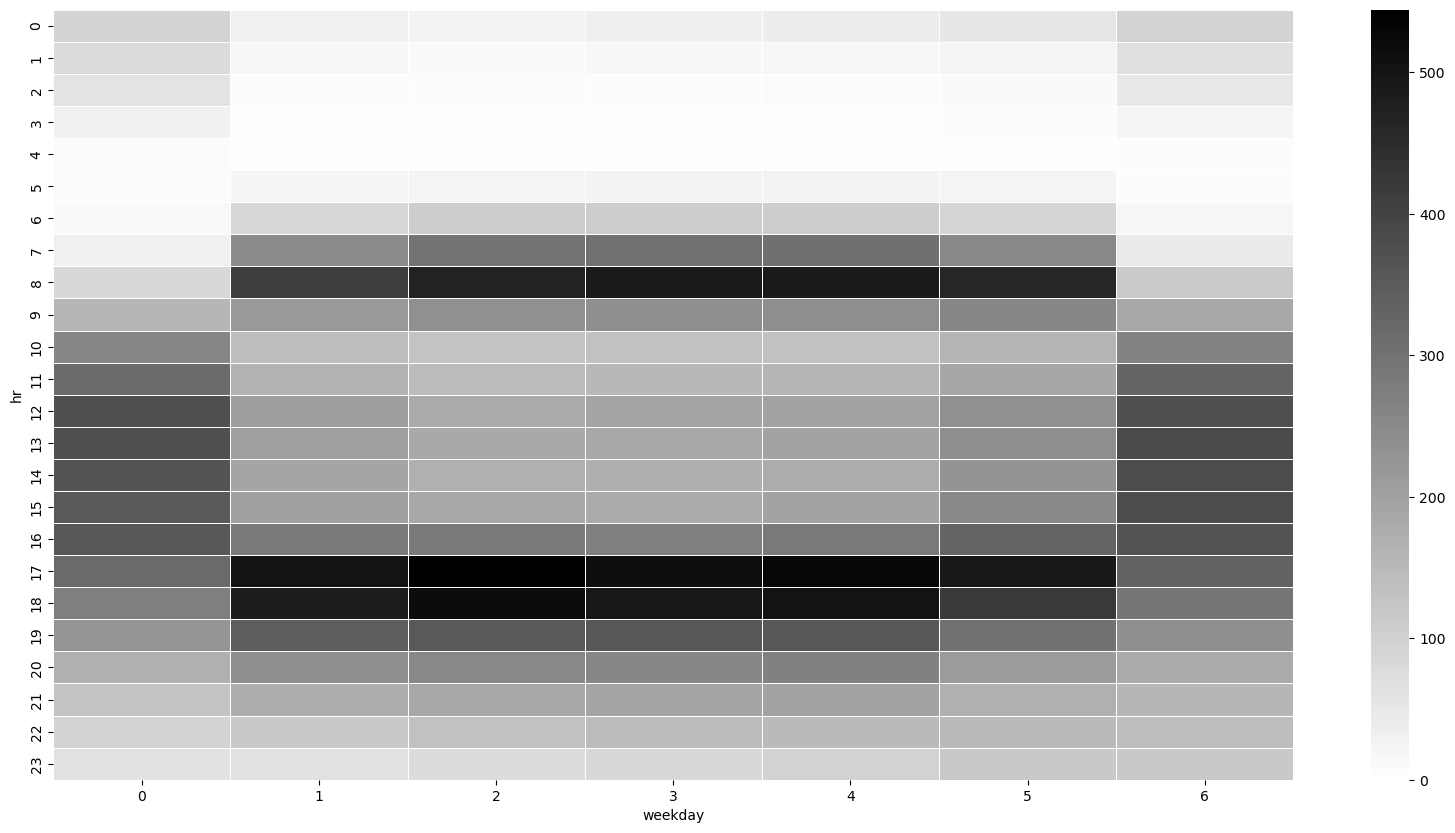

In [20]:
# “heat map showing the number of riders at each hour throughout a week”
df_hm =hour.pivot_table(index = 'hr',columns ='weekday',values ='count')
# Draw a heatmap
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(df_hm,  fmt="d", cmap='binary',linewidths=.5, vmin = 0)
plt.show()